# Student Mental Health Dataset – Data Cleaning and Standardization

In this notebook, we work with a dataset related to student mental health, sourced from an open repository. The goal is to:

- Load and understand the dataset
- Handle missing or inconsistent values
- Standardize the numerical features to prepare for modeling

This is part of a larger machine learning workflow where clean and normalized data improves model accuracy and performance.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Step 1: Load the Dataset

The dataset is fetched from a public GitHub URL. It contains information about student demographics, mental health conditions, and support systems.


In [3]:
url = 'https://raw.githubusercontent.com/nileshely/Student-Mental-Health/main/Student%20Mental%20health.csv'
df = pd.read_csv(url)
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


## Step 2: Handle Missing Values

We begin by identifying missing values in the dataset. Depending on the type of feature, we'll use different imputation strategies — for example:
- Median for numerical columns (like Age)
- Mode or a default category for categorical features (if any)


In [4]:
df.isnull().sum()

,0
Timestamp,0
Choose your gender,0
Age,1
What is your course?,0
Your current year of Study,0
What is your CGPA?,0
Marital status,0
Do you have Depression?,0
Do you have Anxiety?,0
Do you have Panic attack?,0


In [6]:
df['Age'].isnull().sum()

np.int64(1)

In [8]:
df['Age']=df['Age'].fillna(df['Age'].median)

In [9]:
df.isnull().sum()

,0
Timestamp,0
Choose your gender,0
Age,0
What is your course?,0
Your current year of Study,0
What is your CGPA?,0
Marital status,0
Do you have Depression?,0
Do you have Anxiety?,0
Do you have Panic attack?,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Timestamp                                     101 non-null    object
 1   Choose your gender                            101 non-null    object
 2   Age                                           101 non-null    object
 3   What is your course?                          101 non-null    object
 4   Your current year of Study                    101 non-null    object
 5   What is your CGPA?                            101 non-null    object
 6   Marital status                                101 non-null    object
 7   Do you have Depression?                       101 non-null    object
 8   Do you have Anxiety?                          101 non-null    object
 9   Do you have Panic attack?                     101 non-null    object
 10  Di

In [18]:
df[['Age','What is your CGPA?']].describe()

,Age,What is your CGPA?
count,101.0,101
unique,8.0,6
top,18.0,3.50 - 4.00
freq,32.0,47


In [21]:
df['CGPA Midpoint']=df['What is your CGPA?'].str.replace(" ","").str.split("-").apply(lambda x: (float(x[0])+float(x[1]))/2)
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA Midpoint
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,3.245
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,3.245
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,3.245
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,3.245
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,3.245
...,...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No,3.750
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No,3.245
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No,3.750
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No,3.750


In [24]:
df=df.drop(columns='What is your CGPA?')

KeyError: "['What is your CGPA?'] not found in axis"

In [25]:
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA Midpoint
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,No,Yes,No,Yes,No,3.245
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,No,No,Yes,No,No,3.245
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,No,Yes,Yes,Yes,No,3.245
3,8/7/2020 12:06,Female,22.0,Laws,year 3,Yes,Yes,No,No,No,3.245
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,No,No,No,No,No,3.245
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,No,No,Yes,No,No,3.750
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,No,Yes,Yes,No,No,3.245
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,Yes,Yes,No,Yes,No,3.750
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,No,No,No,No,No,3.750


In [27]:
df[['Age','CGPA Midpoint']].describe()

,CGPA Midpoint
count,101.000000
mean,3.356287
std,0.585152
min,0.995000
25%,3.245000
50%,3.245000
75%,3.750000
max,3.750000


In [28]:
df.describe()

,CGPA Midpoint
count,101.000000
mean,3.356287
std,0.585152
min,0.995000
25%,3.245000
50%,3.245000
75%,3.750000
max,3.750000


In [31]:
df['Age'].dtype

dtype('O')

In [36]:
df['Age'].unique()


array([18.0, 21.0, 19.0, 22.0, 23.0, 20.0, 24.0,
       <bound method Series.median of 0      18.0
       1      21.0
       2      19.0
       3      22.0
       4      23.0
              ...
       96     21.0
       97     18.0
       98     19.0
       99     23.0
       100    20.0
       Name: Age, Length: 101, dtype: float64>   ], dtype=object)

In [37]:
df['Age'].apply(type).value_counts()


,count
Age,
<class 'float'>,100
<class 'method'>,1


In [39]:
df['Age']=pd.to_numeric(df['Age'],errors='coerce')

In [41]:
df['Age'].isnull().sum()

np.int64(1)

In [42]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [43]:
df.isnull().sum()

,0
Timestamp,0
Choose your gender,0
Age,0
What is your course?,0
Your current year of Study,0
Marital status,0
Do you have Depression?,0
Do you have Anxiety?,0
Do you have Panic attack?,0
Did you seek any specialist for a treatment?,0


In [44]:
df.describe()

,Age,CGPA Midpoint
count,101.000000,101.000000
mean,20.514851,3.356287
std,2.488429,0.585152
min,18.000000,0.995000
25%,18.000000,3.245000
50%,19.000000,3.245000
75%,23.000000,3.750000
max,24.000000,3.750000


<Axes: xlabel='Age', ylabel='CGPA Midpoint'>

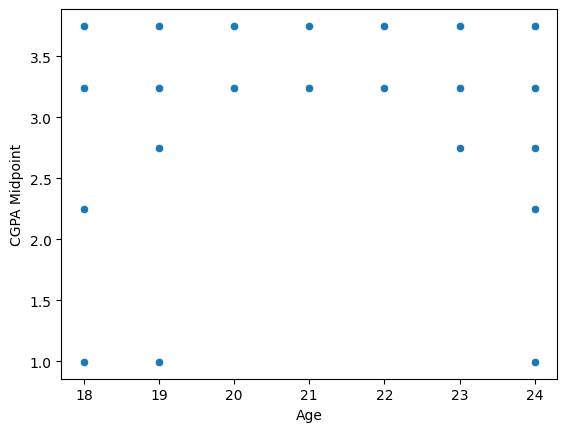

In [45]:
sns.scatterplot(x=df['Age'],y=df['CGPA Midpoint'])

In [46]:
from sklearn.model_selection import train_test_split

In [63]:
X=df[['Age','CGPA Midpoint']]
y=df['Do you have Depression?']

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Step 3: Feature Standardization

Standardization is applied to bring all numerical values to the same scale. This ensures that features with large ranges (like age) don't dominate others during modeling.

We use `StandardScaler` from scikit-learn, which transforms each feature to have:
- Mean = 0
- Standard Deviation = 1


In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler=StandardScaler()

In [67]:
scaler.fit(X_train)

StandardScaler()

In [74]:
X_train_Scaled=scaler.transform(X_train)
X_test_Scaled=scaler.transform(X_test)

In [76]:
X_train_Scaled_df=pd.DataFrame(X_train_Scaled,columns=X_train.columns)
X_test_Scaled_df=pd.DataFrame(X_test_Scaled,columns=X_train.columns)

## Step 4: Visual Comparison (Before vs After Standardization)

To visualize the effect of standardization, we compare feature distributions before and after scaling.


Text(0.5, 1.0, 'Before scaling')

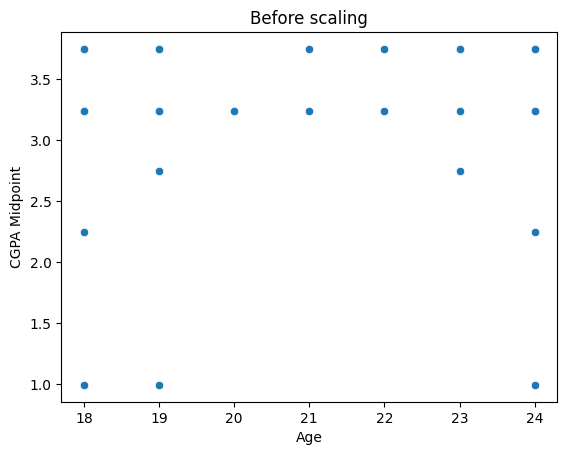

In [77]:
sns.scatterplot(x=X_train['Age'],y=X_train['CGPA Midpoint'])
plt.title("Before scaling")

Text(0.5, 1.0, 'After scaling')

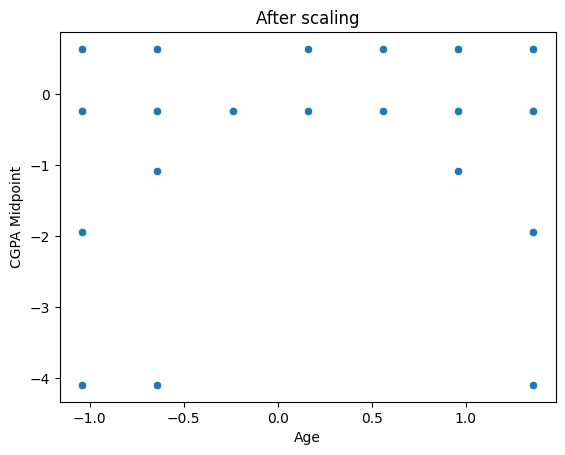

In [79]:
sns.scatterplot(x=X_train_Scaled_df['Age'],y=X_train_Scaled_df['CGPA Midpoint'])
plt.title("After scaling")

Text(0.5, 1.0, 'Before Scaling')

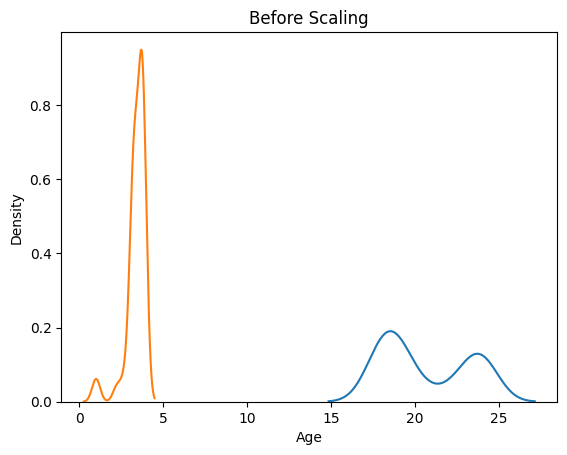

In [80]:
sns.kdeplot(X_train['Age'])
sns.kdeplot(X_train["CGPA Midpoint"])
plt.title("Before Scaling")

Text(0.5, 1.0, 'After Scaling')

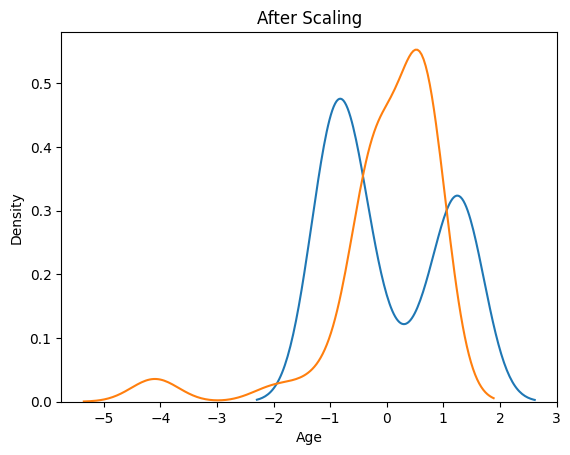

In [82]:
sns.kdeplot(X_train_Scaled_df['Age'])
sns.kdeplot(X_train_Scaled_df["CGPA Midpoint"])
plt.title("After Scaling")

## Summary and Next Steps

In this notebook, we successfully:

- Loaded and explored a real-world mental health dataset
- Handled missing values with appropriate strategies
- Standardized numerical features using scikit-learn

This prepares the data for further analysis or modeling (e.g., clustering, logistic regression, or PCA).
